### <center>San Jose State University<br>Department of Applied Data Science<br><br>**DATA 200<br>Computational Programming for Data Analytics**<br><br>Spring 2024<br>Instructor: Ron Mak</center>

# Linear Regression and Weighted Averages (Array Version)

#### Suppose you're analyzing the test scores of students who studied different numbers of hours for the test. What is the relation between hours studied and test scores?
#### You obtain data from interviewing the students. Different counts of students claimed the study hours.
## Data as a 2-d list:

In [ ]:
import numpy as np

## Scores as a 2-d `numpy` array

In [ ]:
scores_array = np.array([
    [ 0,  3,  5],
    [ 1,  4, 11],
    [ 2,  4, 13],
    [ 3,  5, 39],
    [ 4,  5, 44],
    [ 5, 10, 56],
    [ 6,  9, 57],
    [ 7,  3, 80],
    [ 8,  2, 87],
    [ 9,  1, 89],
    [10,  1, 99]
])

In [ ]:
print('Hours  Count  Avg. score')

for row in scores_array:
    print(f'{row[0]:3}{row[1]:7}{row[2]:10}')

## `X` is a vector of hours, `Y` is a vector of scores

In [ ]:
X = scores_array[:, 0]  # column 0
Y = scores_array[:, 2]  # column 2

In [ ]:
print(' hours X:', X)
print('scores Y:', Y)

## Scatter plot of scores vs. hours

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(X, Y)
plt.show()

## The trend line
#### Now let's calculate and plot the trend line, which mathematicians call the **least-squares linear regression line**.

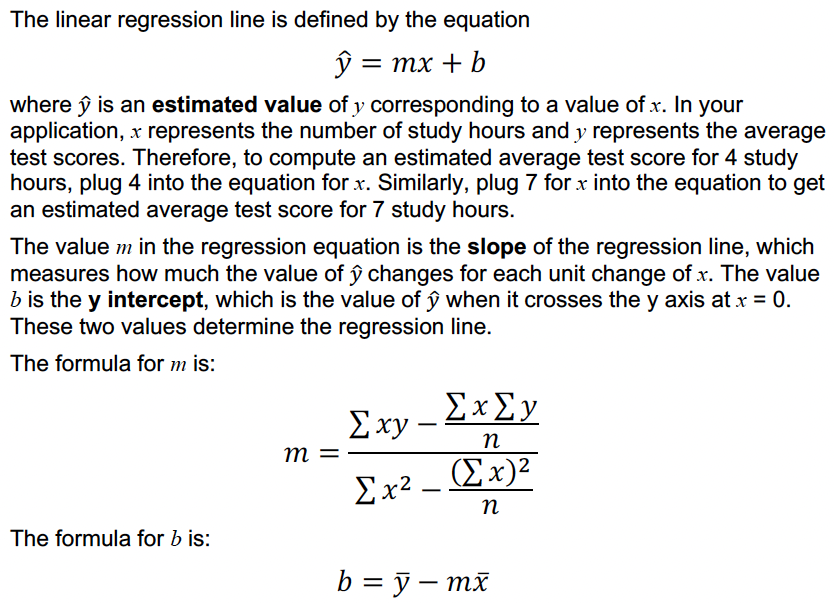
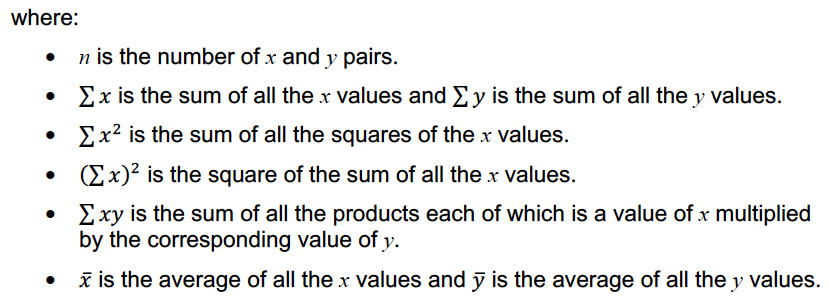

## Scope-intercept function (array version)
#### Based on the above formulas, we can define a function that calculates the slope `m` and the y intercept `b` given the x and y values.

In [ ]:
def calculate_slope_intercept_array_version(X, Y):
    """
    Calculate and return the slope m and y intercept b
    of the least-squares linear regression line y = mx + b
    given the vectors of x and y values.
    """
    n = len(X)

    sum_X  = np.sum(X)
    sum_Y  = np.sum(Y)
    sum_XX = np.sum(X*X)
    sum_XY = np.sum(X*Y)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    
    numerator   = sum_XY - (sum_X*sum_Y)/n
    denominator = sum_XX - ((sum_X*sum_X)/n)
    
    m = numerator/denominator
    b = mean_Y - m*mean_X
    
    return m, b  # slope and intercept    

## Calculate the slope and y intercept

In [ ]:
m, b = calculate_slope_intercept_array_version(X, Y)  # unpack m and b

print(f'      slope m = {m:.2f}')
print(f'y intercept b = {b:.2f}')

## Scatter plot with regression line

#### Since the regression line is a line, we only need its end points to plot it. The function `plt.plot()` can take a **vector** of the x values and a list of the y values of the line to plot. Let's make the regression line red.

In [ ]:
plt.scatter(X, Y)
    
# The regression line. We only need the end points.
# Endpoint 1: x = 0,     y = b
# Endpoint 2: x = X[-1], y = m*X[-1] + b
plt.plot([0, X[-1]], [b, m*X[-1] + b], color='red')

## The weighted average function

#### Let's calculate the weighted average of the scores. We can't simply take the average of the scores because different numbers of students got the scores. Therefore, we can treat the number of students per score as that score's weight.
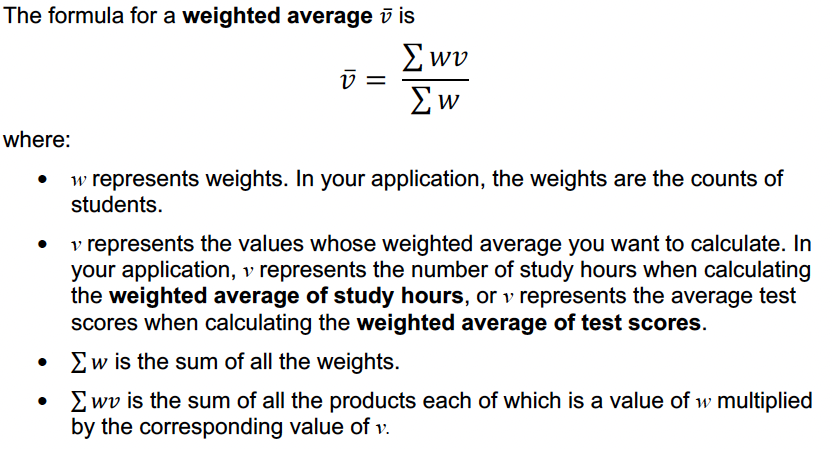

## Weighted average function (array version)
#### Based on the above formulas, we can define a function that calculates a weighted average given weights `W` and values `V`.

In [ ]:
def calculate_weighted_average_array_version(W, V):
    """
    Calculate and return the weighted average of values
    given the weights W and the values V.
    """
    return np.sum(W*V)/np.sum(W)

## Weights `W` is a vector of counts, values `V` is a vector of scores

In [ ]:
W = scores_array[:, 1]  # column 1
V = scores_array[:, 2]  # column 2

In [ ]:
print('counts W:', W)
print('scores V:', Y)

## Calculate and print the weighted average score

In [ ]:
w_avg_score = calculate_weighted_average_array_version(W, V)

print(f'weighted average score = {w_avg_score:.2f}')

In [ ]:
# (C) Copyright 2024 by Ronald Mak